### load dependecies

In [1]:
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)
import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### create small dataset

In [3]:
xs = [0., 1., 2., 3., 4., 5., 6., 7.] # feature (independent variable)
ys = [-.82, -.94, -.12, .26, .39, .64, 1.02, 1.] # labels (dependent variable)

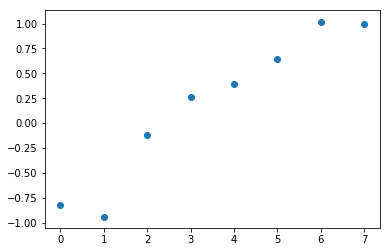

In [5]:
fig, ax = plt.subplots()
_ = ax.scatter(xs, ys)

In [6]:
m = tf.Variable(-0.5)
b = tf.Variable(1.0)

### cost function

In [8]:
total_error = 0
for x, y in zip(xs, ys):
    y_model = m * x + b
    total_error += (y - y_model)**2

### optimizer

In [9]:
optimizer_op = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(total_error)

### initializer

In [10]:
initializer_op = tf.global_variables_initializer()

### execute session

In [16]:
with tf.Session() as session:
    session.run(initializer_op)
    
    epochs = 1000
    for i in range(epochs):
        session.run(optimizer_op)
    slope, intercept = session.run([m, b])

In [17]:
slope

0.29314372

In [18]:
intercept

-0.84175247

In [19]:
y_hat = intercept + slope * np.array(xs)

In [21]:
pd.DataFrame(list(zip(ys, y_hat)), columns=['y', 'y_hat'])

,y,y_hat
0,-0.82,-0.841752
1,-0.94,-0.548609
2,-0.12,-0.255465
3,0.26,0.037679
4,0.39,0.330822
5,0.64,0.623966
6,1.02,0.917110
7,1.00,1.210254


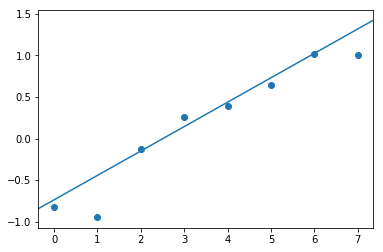

In [23]:
fig, ax = plt.subplots()

ax.scatter(xs, ys)
x_min, x_max = ax.get_xlim()
y_min, y_max = intercept, intercept + slope * (x_max - x_min)

ax.plot([x_min, x_max], [y_min, y_max])
_ = ax.set_xlim([x_min, x_max])